# Homework 4: SVM


This assignment is due on Moodle by **11:59pm on Friday November 8**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- In this homework you will explore the primal and dual representations of support vector machines, as well as the performance of various kernels while classifying sentiments. Install the following packages: `nltk` (Version: 3.4.5), `scikit-learn` (Version: 0.21.3)


**Name**: Sai Siddharth Lanka  
**Identikey**: sala1847  
**Email**: sala1847@colorado.edu

In [2]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

[40 Points] Problem 1 - Basic concepts of SVM
---

**Part 1 [10 points]:** 
* What are the main differences between the primal and the dual representations?
* For the variables $\xi_i$, $C$ in the primal formation, what are their roles? Write out the upper/lower bounds (constraints) of these variables. What are the interpretation for these maximum/minimum values?
* For the variable $\alpha_i$, $\beta_i$ in the dual formation, what are the upper/lower bound (constraints) of them?

*** Question 1 ***

-   We introduce the duality condition since it's easier to solve constrained optimization problem.
\begin{equation}
  min_{w,b} 1/2 * ||w||^2
\end{equation}

-  We convert the primal problem into a lagrangian dual problem and add a few lagrangian multipliers alpha and beta and solve for the original variables in the primal problem that minimize the objective function. The objective function in the dual case is the lagrange's dual function. Alpha is greater than zero for all the support vectors which in turn contribute to w.

-  In the primal problem we are trying to minimize or solve the constrained optimization problem subject to a few constraints and inequalities.

*** Question 2 ***

-  We introduce those variables in the soft margin SVM case where the data is not linearly separable. By introducing the slack variable $\xi_i$ we allow a certain number of training points to be misclassified or on the wrong side of decision boundary.

-  $C$ describes the trade-off between margin and the slack variables. If we use a relatively high C, then w would no longer matter and we may end up with a relatively high margin and a smaller slack. A high C would also decrease bias and increase variance when compared with regularisation.

- The constrained optimization problem becomes:

\begin{equation}
      min_{w,b} 1/2 * ||w||^2 + C * \sum_{i=1}^{n} \xi_i  \\ \text{s.t.}
       y_{i} * (w_{i}*x + b) \geq 1 - \xi_i     
\end{equation}
\begin{equation}
      \xi_i \geq 0
\end{equation}

-  $\xi_i$ = 0 means atleast one margin on correct side of decision boundary
-  $\xi_i$ > 0 means there are some points on the wrong side of the decision boundary

*** Question 3 ***
\begin{equation}
 \alpha_{i} \geq 0, i \in [1, n]
\end{equation}
\begin{equation}
    \beta_{i} \geq 0, i \in [1,n]
\end{equation}
\begin{equation}
    \alpha_{i} + \beta_{i} = C
\end{equation}

**Part 2 [20 points]:** 

 * Given a weight vector, implement the `find_support` function that returns the indices of the support vectors.
 * Given a weight vector, implement the `find_slack` function that returns the indices of the vectors with nonzero slack.
 * Given the alpha dual vector, implement the `weight_vector` function that returns the corresponding weight vector.

In [3]:
class SVM:
    
    def __init__(self):
        self.kINSP = np.array([(1, 8, +1),
                       (7, 2, -1),
                       (6, -1, -1),
                       (-5, 0, +1),
                       (-5, 1, -1),
                       (-5, 2, +1),
                       (6, 3, +1),
                       (6, 1, -1),
                       (5, 2, -1)])
        self.kSEP = np.array([(-2, 2, +1),    # 0 - A
                      (0, 4, +1),             # 1 - B
                      (2, 1, +1),             # 2 - C
                      (-2, -3, -1),           # 3 - D
                      (0, -1, -1),            # 4 - E
                      (2, -3, -1),            # 5 - F
                      ])


    def weight_vector(self, x, y, alpha):
        """
        Given a vector of alphas, compute the primal weight vector w.
        The vector w should be returned as an Numpy array.
        """
        w = np.zeros(len(x[0]))
        # YOUR CODE HERE
        for index, value in enumerate(x):
            alpha_y = y[index] * alpha[index]
            w = w + np.dot(alpha_y, value)
        return w


    def find_support(self, x, y, w, b, tolerance=0.001):
        """
        Given a set of training examples and primal weights, return the indices
        of all of the support vectors as a set.
        """
        support = set()
        # YOUR CODE HERE
        for index, value in enumerate(x):
            dot_product = (np.dot(value, w) + b)
            print('Dot Product: ', y[index]*dot_product)
            if np.abs(y[index]*dot_product) - 1 <= tolerance:
                support.add(index)
        return support



    def find_slack(self, x, y, w, b):
        """
        Given a set of training examples and primal weights, return the indices
        of all examples with nonzero slack as a set.
        """
        slack = set()
        # YOUR CODE HERE
        for index, value in enumerate(x):
            dot_product = np.dot(value, w) + b
            if y[index]*dot_product < 1:
                slack.add(index)
        return slack

In [4]:
from tests import tests
tests.run_test_suite("prob 1", SVM)

TestWideSlack (tests.tests.TestSVM) ... ok
TestNarrowSlack (tests.tests.TestSVM) ... ok
TestSupport (tests.tests.TestSVM) ... ok
TestWeight (tests.tests.TestSVM) ... 

Dot Product:  1.0000000000000002
Dot Product:  3.0
Dot Product:  1.0000000000000002
Dot Product:  3.0000000000000004
Dot Product:  1.0
Dot Product:  2.2000000000000006


ok

----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK


**Part 3 [10 points]:** 

The goal of this problem is to correctly classify test data points, given a training data set.
For this problem, assume that we are training an SVM with a quadratic kernel, which means our kernel function is a polynomial kernel of degree 2. You are given the data set presented in the figure below. The slack penalty $C$ will determine the location of the decision boundary.

Justify the following questions in a sentence or via drawing decision boundary.
![training_data](./data/data.png)

* Where would the decision boundary be for very large values of $C$ ?
* Where you would expect the decision boundary to be if  $C = 0$ ?
* Which of the two cases above would you expect to generalize better on test data? Why?

YOUR ANSWER HERE

-  For large values of C, the weights would no longer matter and would result in a big margin. The polynomial that gives the largest margin would be the decision boundary. 
- When C = 0, a circle separating the two classes can be the decision boundary.
- On test data C=0 may perform better because a high C value decreases bias and increases variance. The decision boundary is sensitive to the values of C. C=0 should generalize better on test data.

[30 points] Problem 2 - The Kernel Trick
---
The kernel trick can make SVM powerful and become non-linear. In this problem we will get familiar with the kernel trick.

**Part 1 [10 points]:**

We will construct a support vector machine that computes the XOR function, using values of +1 and −1 (instead of 1 and 0) for both inputs and outputs, so that an example looks like ($[−1, 1], 1$) or ($[−1, −1], −1$). Map the input $[x_1, x_2]$ into a space consisting of $x_1$ and $x_1x_2$. Plot the four input points in this space, and the maximal margin separator. Give the margin value in the markdown cell. Remeber to indicate which points have output +1 and which -1.

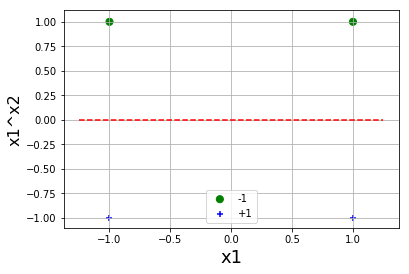

In [5]:
x1 = [-1,1]
x1_x2 = [1,1]

x1_scatter_2 = [-1,1]
x1_x2_scatter_2 = [-1,-1]
color=['g', 'g']
plt.scatter(x1,x1_x2, s=50 ,marker='o', c=color, label='-1') 
plt.scatter(x1_scatter_2, x1_x2_scatter_2, marker='+', c=['blue', 'blue'], label='+1')
plt.plot([-1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25], [0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0], 'r--') 

plt.xlabel('x1', fontsize=18)
plt.ylabel('x1^x2', fontsize=16)
plt.legend(loc='best')
plt.grid()


### Truth table for XOR function

|x1 |   x2   |  x1 xor x2  |
|---| -----  |   --------  |
|-1 |   -1   |    -1       |
|-1 |    1   |     1       |
| 1 |   -1   |     1       |
| 1 |    1   |    -1       |

### Truth table after transformation

|x1 |   x3=x1x2    |   x1 xor x2    |
|---|   -----      |   --------     |
|-1 |     1        |       -1       |
|-1 |    -1        |        1       |
| 1 |    -1        |        1       |
| 1 |     1        |       -1       |

The margin after the transformation is the equation of the line passing through x-axis(y=0). In our case this becomes x1*x2 = 0. The points with output -1 lie above the x-axis and the points below the x-axis are training points with output 1.

*** The margin is 1 ***




YOUR ANSWER HERE

**Part 2 [5 points]:** Plot the separating line of **Part 1** back in the original Euclidean input space.

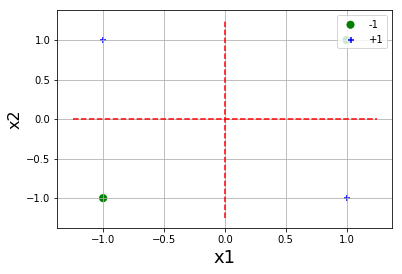

In [6]:
# YOUR CODE HERE
x1 = [-1,1]
x1_x2 = [-1,1]

x1_scatter_2 = [-1,1]
x1_x2_scatter_2 = [1,-1]
color=['g', 'g']
plt.scatter(x1,x1_x2, s=50 ,marker='o', c=color, label='-1') 
plt.scatter(x1_scatter_2, x1_x2_scatter_2, marker='+', c=['blue', 'blue'], label='+1')
plt.plot([-1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25], [0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0], 'r--') 
plt.plot([0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0], [-1.25, -1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1, 1.25],'r--') 
plt.xlabel('x1', fontsize=18)
plt.ylabel('x2', fontsize=16)
plt.legend(loc='best')
plt.grid()

**Part 3 [5 points]:** Is the seporater in **Part 1** linear? Is the one in **Part 2** linear? Explain your answer.

The separator in Part1 is linear. After applying the feature transformation, the data is linearly separable and a linear decision boundary can be obtained for that particular data point. When we plot those lines back in the original euclidean space(x1=0, x2=0), it's not linear anymore as the data itself is not linearly separable.

**Part 4 [10 points]:**
The key point of the so-called “kernel trick” in SVMs is to learn a classifier that effectively separates the training data in a higher dimensional space without having to explicitly compute the representation $\phi(\mathbf{x})$ of every point $\mathbf{x}$ in the original input space. Instead, all the work is done through the kernel function $K(\mathbf{x}_i, \mathbf{x}_i)$, for example, we can use $K(\mathbf{x}_i, \mathbf{x}_i) = \phi(\mathbf{x}_i)\phi(\mathbf{x}_j)$.

Show how to compute the squared Euclidean distance in the projected space between any two points $\mathbf{x}_i$, $\mathbf{x}_j$ in the original space without explicitly computing the $\phi$ mapping, instead using the kernel function $K$. In other words, derive $d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j))$ into a form using only the kernel function.

YOUR ANSWER HERE

\begin{equation}
d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = (\phi(\mathbf{x}_i) - \phi(\mathbf{x}_j))^2
\end{equation}

\begin{equation}
d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = (\phi(\mathbf{x}_i))^2 + (\phi(\mathbf{x}_j))^2 - 2\phi(\mathbf{x}_i)\phi(\mathbf{x}_j)
\end{equation}

\begin{equation}
d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = \phi(\mathbf{x}_i)\phi(\mathbf{x}_i) + \phi(\mathbf{x}_j\phi(\mathbf{x}_j) - 2K(\mathbf{x}_i, \mathbf{x}_j)
\end{equation}

\begin{equation}
d(\phi(\mathbf{x}_i), \phi(\mathbf{x}_j)) = K(\mathbf{x}_i, \mathbf{x}_i) + K(\mathbf{x}_j, \mathbf{x}_j) - 2K(\mathbf{x}_i, \mathbf{x}_j)
\end{equation}

[30 points] Problem 3 - SVM with `sklearn`
---

In this problem, you will get familiar with important practical functions in scikit-learn such as pipeline, grid search, and cross validation. You will experiment with these using support vector machines.

Note that grid search can take some time on your laptop, so make sure that your code is correct with a small subset of the training data and search a reasonable number of options.

* Use the Sklearn implementation of support vector machines to train a classifier to distinguish Positive and negative sentiments
* Experiment with linear, polynomial, and RBF kernels. First, perform a GridSearch over each kernel function and a small set of parameters defined over a wide range to help narrow down the search space.
* Then choose the best performing kernel from your coarse scale search and define a narrower set of parameters for random search to further optimize the hyperparameters. Comment on the experiments you ran and optimal hyperparameters you found.
Hint: http://scikit-learn.org/stable/modules/grid_search.html
* Evaluate classification performance for each model for optimal parameters by testing on a hold-out set.

Following is a dataset containing reviews and sentiments associated with it.

We will create a SVM Classifier to predict positive or negative sentiments.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
reviews  = pd.read_csv('./data/reviews.csv')
train, test = train_test_split(reviews, test_size=0.2, random_state=5622)
X_train = train['reviews']
X_test = test['reviews']
y_train = train['sentiment']
y_test = test['sentiment']

# X_train = X_train[:100]
# y_train = y_train[:100]

# X_train = X_train[3000:]
# X_test = X_test[500:]
# Y_train = y_train[3000:]
# y_test = y_test[500:]
print('Length of X_train: ', len(X_train))
print('Length of y_train: ', len(y_train))

Length of X_train:  4000
Length of y_train:  4000


In [8]:
len(X_train),sum(y_train),len(X_test),sum(y_test)

(4000, 1995, 1000, 505)

In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

**Part 1 [5 points]:**

Use `CountVectorizer` to vectorize reviews as dictionary of term frequencies.
Define the crossvalidation split using `StratifiedKFold`.

In [10]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

nltk.download('stopwords')
en_stopwords = set(stopwords.words("english")) 

# CREATE CountVectorizer using sklearn.feature_extraction.text.CountVectorizer
# Hint: use the above tokenize function
# Hint: play with different parameters, in particular, min_df can help with generalizability
# YOUR CODE HERE
vectorizer = CountVectorizer(tokenizer=tokenize, min_df=2, stop_words=en_stopwords)
X = vectorizer.fit_transform(X_train)
# print("Feature Names: ", vectorizer.get_feature_names())
# split dataset using StratifiedKFold into 5 splits using sklearn.model_selection.StratifiedKFold.
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5622)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/siddharthlanka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


***NOTE: I'm on a  dual core I5 with hyperthreading so the GridSearch took about 24 minutes to run. I tried parallelizing it by setting n_jobs to -1 but to no increase in time.***

**Part 2 [10 points]:**
* Create a pipeline with our `CountVectorizer` object in **Part 1** and an SVM Classifier.
* Create and fit a `GridSearchCV` object with the following parameter values:
  * Linear kernel, $C = 0.01, 1.0, 10.0$
  * Polynomial kernel, $\text{degree} = 2, 3$, $\gamma = 0.1, 0.5, 1$
  * RBF kernel, $\gamma = 0.1, 0.5, 1$
* Report accuracy on the best estimator from our `GridSearchCV` object.

In [11]:
np.random.seed(5622)
# Define pipeline using make_pipeline with vectorizer and SVM Classifier
# YOUR CODE HERE
pipe = Pipeline(steps=[('vectorizer', vectorizer), ('svm', SVC())])
# raise NotImplementedError()
param_grid = {
    'svm__C': [0.01, 1.0, 10.0],
    'svm__degree': [2, 3],
    'svm__kernel': ['linear', 'poly', 'rbf'],
    'svm__gamma': [0.1, 0.5, 1]
}
# Create GridSearchCV with pipeline and the grid search parameters given above,
# using "accuracy" for scoring.
g = GridSearchCV(pipe, param_grid, scoring='accuracy', n_jobs=-1) 
g.fit(X_train, y_train)
# YOUR CODE HERE
# raise NotImplementedError()

# For debugging purposes, it makes sense to use a smaller set of training set to speed up the grid search progress
# _ = grid_svm.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'the...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'svm__C': [0.01, 1.0, 10.0], 'svm__degree': [2, 3], 'svm__kernel': ['linear', 'poly', 'rbf'], 'svm__gamma': [0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [12]:
# Report best parameters and CV score from grid search
# YOUR CODE HERE
print('Best Params: ', g.best_params_)
print('Best Score: ', g.best_score_)
# raise NotImplementedError()

Best Params:  {'svm__C': 0.01, 'svm__degree': 2, 'svm__gamma': 0.1, 'svm__kernel': 'linear'}
Best Score:  0.86525


In [13]:
y_pred = g.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.876


**Part 3 [10 points]:**

Choose the best performing kernel and parameter values from your coarse scale grid search and use them to set up a narrower range of parameter values. We will use randomized grid search to sample a fixed number of these candidate parameter sets for cross validation. The number of sampled parameter sets `n_iter` provides a trade-off between computational cost and quality of the "optimal" parameters. Feel free to experiment with different values of this parameter, but please change it back to `n_iter = 5` before submitting your assignment.

In [14]:
# Set random seed for deterministic output
np.random.seed(5622)
pipeline_svm = pipe
kfolds = skf


# Set param_grid to a dictionary containing parameter values for fine scale search.
# YOUR CODE HERE
# raise NotImplementedError()
param_grid_rcv = {
    'svm__C': [0.002, 0.004, 0.006, 0.008, 0.01],
    'svm__kernel': ['linear'],
    'svm__gamma': [0.1]
}
# Create randomized parameter search over fine scale grid;
# Do NOT change the value of n_iter in the submitted version of your notebook.
n_iter = 5
random_svm = RandomizedSearchCV(pipeline_svm,
                                param_distributions=param_grid_rcv,
                                n_iter=n_iter,
                                cv = kfolds,
                                scoring="accuracy",
                                verbose=1,   
                                n_jobs=-1)

_ = random_svm.fit(X_train, y_train)
print('Random svm: ', random_svm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.9min finished


Random svm:  RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5622, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=2,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'the...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
          fit_params=None, iid=True, n_iter=5, n_jobs=-1,
          param_distributions={'svm__C': [0.002, 0.004, 0.006, 0.008, 0.01], 'svm__kernel': ['linear'], 'svm__gamma': [0.1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=1)


In [15]:
# Report best parameters and CV score from grid search
# YOUR CODE HERE
print("Best Paramters: ", random_svm.best_params_)
print("Best Score: ", random_svm.best_score_)

Best Paramters:  {'svm__kernel': 'linear', 'svm__gamma': 0.1, 'svm__C': 0.01}
Best Score:  0.87525


In [16]:
y_pred_random = random_svm.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, y_pred_random))

Accuracy Score:  0.876


In [17]:
def report_results(model, X, y):
    pred = model.predict(X)        
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [18]:
report_results(random_svm.best_estimator_, X_test, y_test)

{'f1': 0.8784313725490197,
 'acc': 0.876,
 'precision': 0.8699029126213592,
 'recall': 0.8871287128712871}

**Part 4 [5 points]:**

Explain the overall procedure, and report the final result including which hyperparameter values were chosen. Make sure to explain your reasoning in choosing a refined parameter search space in **Part 3**.

We used gridsearchCV for parameter tuning. We specified all our paramters in the form of a grid. We initially tokenize all training points and build a corpus that is passed to countVectorizer which is the first step in our sklearn pipeline. CountVectorizer builds the term frequencies for each text from the corpus. The last entity in scikit-learn pipeline should implement the fit menthod and that is where the classifier is defind, linear SVC in this case. We provide our parameter grid and the pipeline object to the GridSearchCV function where it trains the model with a combination of hyperparamters and returns the best results.

We finally use randomizedSearchCV after obtaining the best hyperparameters from gridsearch to narrow down the best hyperparmaters. Our input is divided into 5 folds defined by the 'skf' variable above. GridSearch is computationally exhaustive than randomized search cv as we are sampling over a few hyperparameters in the latter. RandomizedSearch is to narrow down the hyperparmeters in the best parameters space.

Best Parameters: {'svm__kernel': 'linear', 'svm__gamma': 0.1, 'svm__C': 0.01}   
Accuracy Score: 0.87525

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://forms.gle/bEaNM6G2qFRKhU4Z9) to solicit your feedback for how to improve the course.